### Train a model on our prepared data and features

In this notebook, we take the features that we generated and train different ML models on it to assess the predictiveness of the features and eventually create a good model.

In [80]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 40)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_pickle('../datasets/processed_clean/business_data_processed.pkl')

Let's take a look at our dataframe created by merging the old and new datasets and creating the new features.

In [15]:
df.head(3)

,business_id,business_name,categories,city,full_address,display_phone,review_count,stars,price_tag,is_claimed,is_closed,image,url,latitude,longitude,reviews_per_week,oldest_review,std_of_stars,median_of_stars,votes_per_week,stars_linear_coef,business_density,business_similar_density,zprice_all,zreview_count_all,zreview_per_week_all,zstar_all,is_chain
0,5292a3ee-c57b-4c55-b882-1eebbafbb69c,Taverna Fevan,"[Mediterranean, European, Albanian]",Vlore County,"Palase, Dhermi Albania",+355 68 330 0908,134.0,4.0,2.5,True,False,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.160217,19.628233,0.177365,84.571429,1.549193,5.0,0.153716,-0.000859,23.0,14.0,0.211957,1.009349,1.311021,0.143478,False
1,777dcd53-bef2-45f0-a4f3-aade07195536,Taverna Hibraj,"[Barbecue, European, Albanian]",Vlore County,"SH8, Llogara, Llogara National Park Albania",+355 69 616 1807,22.0,4.5,1.0,True,False,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.209970,19.579586,0.024162,289.714286,0.000000,5.0,0.003452,-0.000000,2.0,4.0,0.000000,-1.000000,-1.000000,0.000000,False
2,7dadd1a8-f799-459b-bad1-dba165669780,Calme Palase,"[Bar, Cafe, European, Pub]",Vlore County,"Rruga E Plazhit Te Palases, Palase Albania",None,3.0,2.5,1.0,False,False,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",https://www.tripadvisor.com/Restaurant_Review-...,40.170204,19.583406,0.021649,138.571429,1.885618,1.0,0.036082,-0.000023,3.0,8.0,0.000000,0.000000,-0.972511,-0.066667,False


In [16]:
df.columns

Index(['business_id', 'business_name', 'categories', 'city', 'full_address',
       'display_phone', 'review_count', 'stars', 'price_tag', 'is_claimed',
       'is_closed', 'image', 'url', 'latitude', 'longitude',
       'reviews_per_week', 'oldest_review', 'std_of_stars', 'median_of_stars',
       'votes_per_week', 'stars_linear_coef', 'business_density',
       'business_similar_density', 'zprice_all', 'zreview_count_all',
       'zreview_per_week_all', 'zstar_all', 'is_chain'],
      dtype='object')

Percentage of closed restaurants? Might not be good!

In [17]:
len(df[df['is_closed'] == True])/len(df)

0.14377470355731226

Text(0, 0.5, 'Total Number of Restaurants')

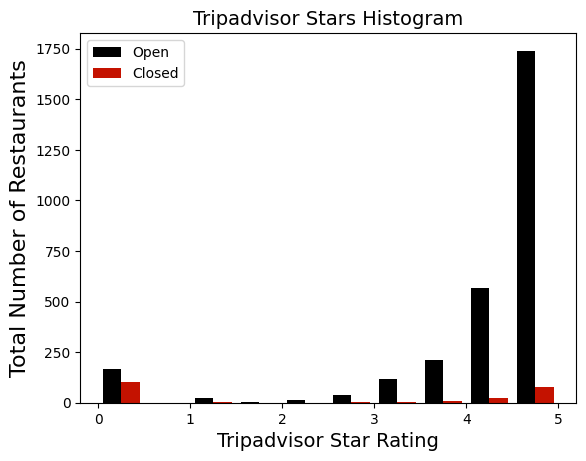

In [20]:
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Tripadvisor Stars Histogram',fontsize=14)
plt.xlabel('Tripadvisor Star Rating',fontsize=14)
plt.ylabel('Total Number of Restaurants',fontsize=16)

Text(0, 0.5, 'Integral Value')

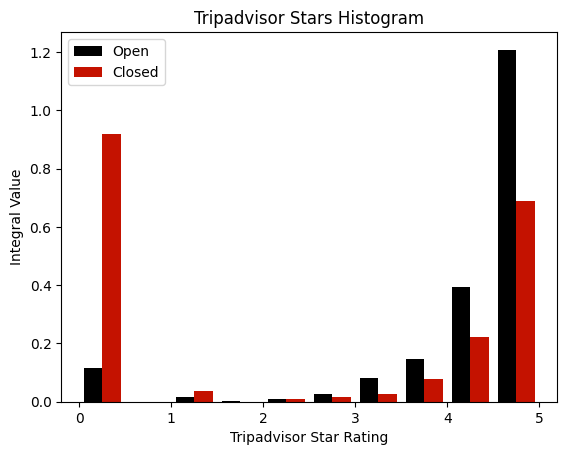

In [25]:
# The normed option normalizes in a way that the integral is 1 that means that the y-axis is not the percentage
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'], density=True)


plt.legend()
plt.title('Tripadvisor Stars Histogram')
plt.xlabel('Tripadvisor Star Rating')
plt.ylabel('Integral Value')

Text(0, 0.5, 'Percentages per Category (%)')

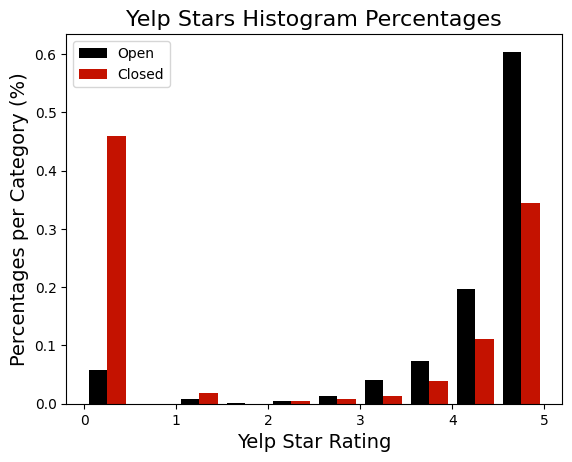

In [26]:
open_length = len(df[df['is_closed']==0].dropna()['stars'])
closed_length = len(df[df['is_closed']==1].dropna()['stars'])
weights = [np.ones(open_length)/open_length,np.ones(closed_length)/closed_length]
plt.hist([df[df['is_closed']==0].dropna()['stars'].values,\
          df[df['is_closed']==1].dropna()['stars'].values],\
        label=['Open','Closed'],color=['k','#c41200'],weights=weights)


plt.legend()
plt.title('Yelp Stars Histogram Percentages',fontsize=16)
plt.xlabel('Yelp Star Rating',fontsize=14)
plt.ylabel('Percentages per Category (%)',fontsize=14)

Text(0.5, 0, 'Total Number of Reviews')

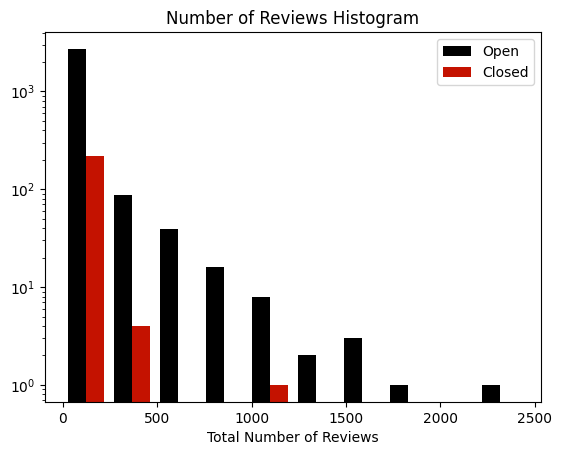

In [27]:
plt.hist([df[df['is_closed']==0].dropna()['review_count'].values,\
          df[df['is_closed']==1].dropna()['review_count'].values],\
        label=['Open','Closed'],color=['k','#c41200'],log=True)


plt.legend()
plt.title('Number of Reviews Histogram')
plt.xlabel('Total Number of Reviews')

Text(0.5, 1.0, 'Price')

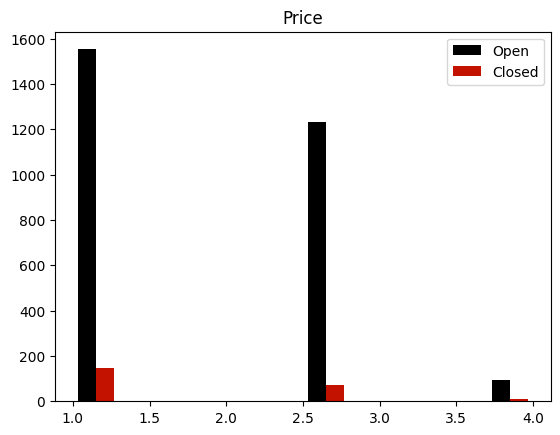

In [28]:
plt.hist([df[df['is_closed']==0].dropna()['price_tag'].values,\
          df[df['is_closed']==1].dropna()['price_tag'].values],\
        label=['Open','Closed'],color=['k','#c41200'])


plt.legend()
plt.title('Price')

In [31]:
df_ml = df[['review_count','stars','price_tag','oldest_review','std_of_stars','reviews_per_week',\
            'median_of_stars','votes_per_week','stars_linear_coef','business_density',\
            'business_similar_density','zreview_count_all','zstar_all','zprice_all','zreview_per_week_all',\
            'is_claimed','is_chain','is_closed']]

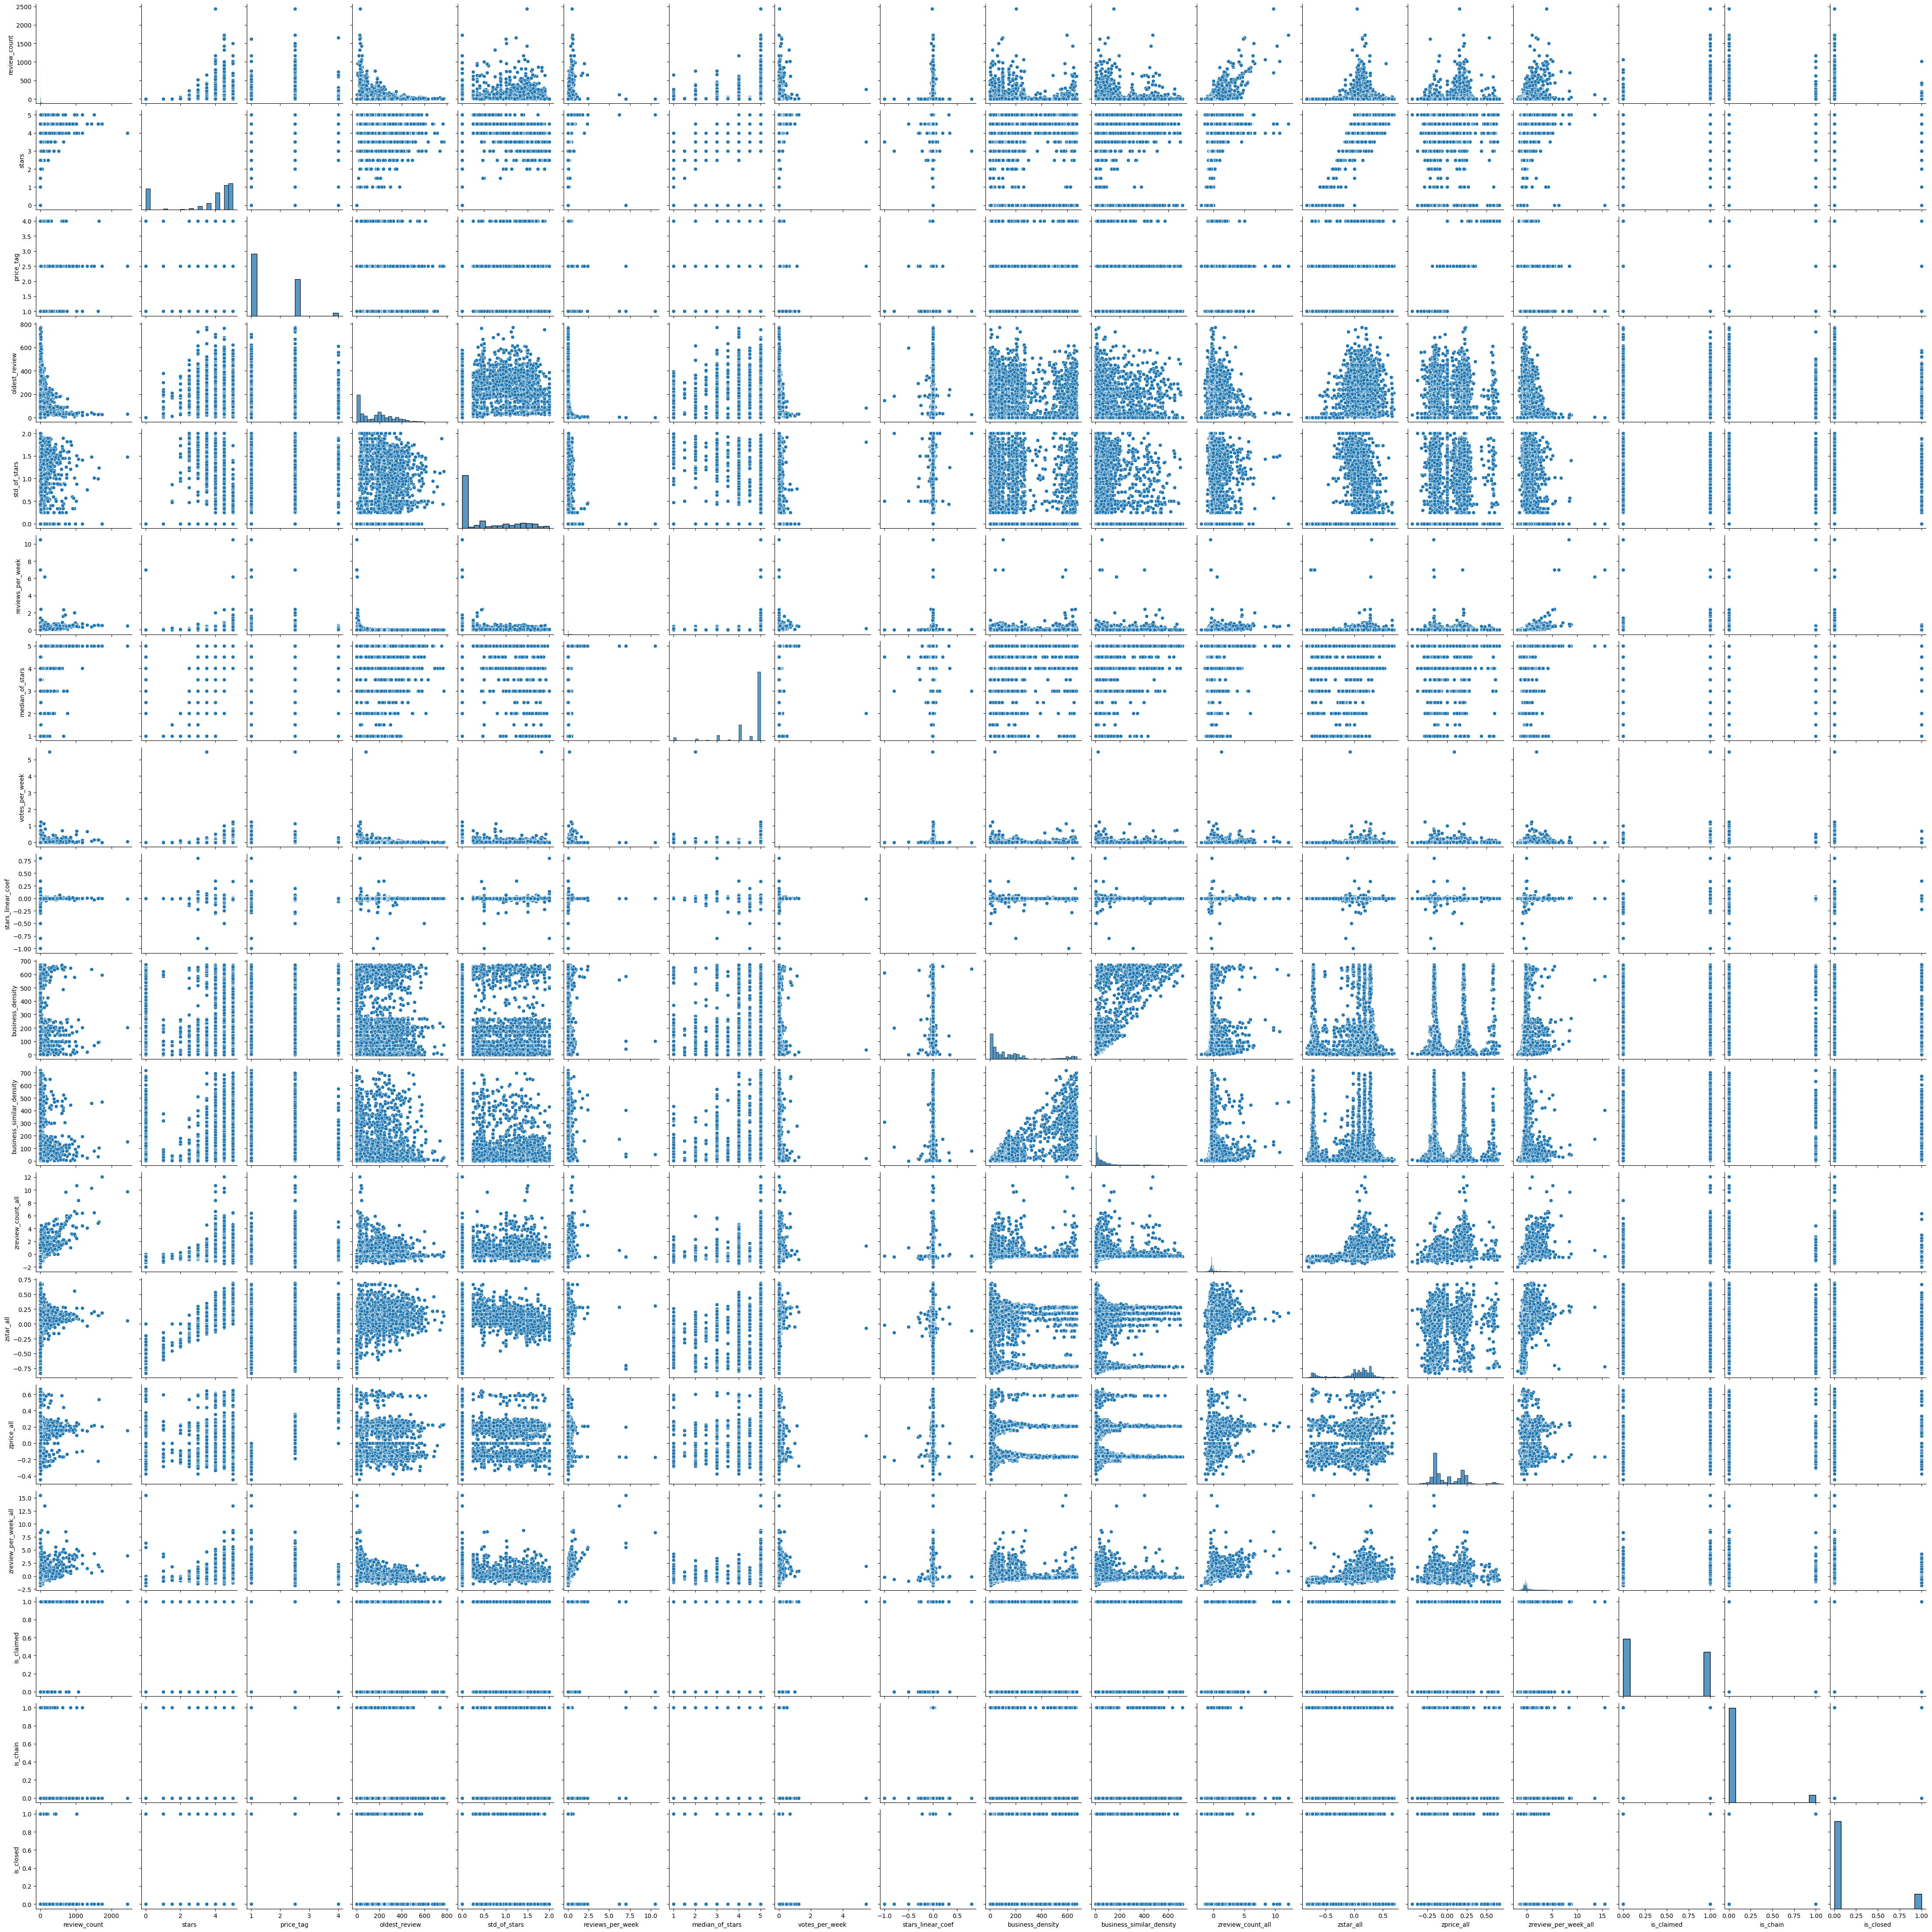

In [82]:
sns.pairplot(df_ml)

In [32]:
len(df_ml)

4048

In [36]:
for column in ['is_claimed', 'is_chain', 'is_closed']:
    df_ml[column] = df_ml[column].apply(lambda x: int(x))

/var/folders/tr/qq7qwqx91mq6jv07l_3ksqlm0000gn/T/ipykernel_90910/74214307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml[column] = df_ml[column].apply(lambda x: int(x))


In [39]:
df_ml_features = df_ml.drop('is_closed', axis=1)
df_ml_target = df_ml['is_closed']

In [91]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_score, recall_score, matthews_corrcoef, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

logistic_model = LogisticRegression(random_state=0, max_iter=2000)
gaussian_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier(random_state=1)
gradient_boosting_model = GradientBoostingClassifier(random_state=1)
random_forest_model = RandomForestClassifier(random_state=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_features, df_ml_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_ml_target)

In [94]:
logistic_model.fit(X_train,list(y_train.values))
y_pred = logistic_model.predict(X_test)
print('Accuracy: ', logistic_model.score(X_test,list(y_test.values)))
print('Mathews:', matthews_corrcoef(y_test.values, y_pred))
print('Precision: ', precision_score(list(y_test.values),y_pred))
print('Recall: ', recall_score(list(y_test.values),y_pred))
print('F1 Score: ', f1_score(list(y_test.values),y_pred))
print('AUC:', roc_auc_score(y_test.values, y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.8901234567901235
Mathews: 0.5253411670246104
Precision:  0.6363636363636364
Recall:  0.5431034482758621
F1 Score:  0.586046511627907
AUC: 0.7456151247142999
Confusion Matrix: 
 [[658  36]
 [ 53  63]]


In [95]:
gaussian_model.fit(X_train,list(y_train.values))
y_pred = gaussian_model.predict(X_test)
print('Accuracy: ', gaussian_model.score(X_test,list(y_test.values)))
print('Mathews:', matthews_corrcoef(y_test.values, y_pred))
print('Precision: ', precision_score(list(y_test.values),y_pred))
print('Recall: ', recall_score(list(y_test.values),y_pred))
print('F1 Score: ', f1_score(list(y_test.values),y_pred))
print('AUC:', roc_auc_score(y_test.values, y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.7185185185185186
Mathews: 0.38657208740289073
Precision:  0.31699346405228757
Recall:  0.8362068965517241
F1 Score:  0.4597156398104265
AUC: 0.7675270793997814
Confusion Matrix: 
 [[485 209]
 [ 19  97]]


In [96]:
decision_tree_model.fit(X_train,list(y_train.values))
y_pred = decision_tree_model.predict(X_test)
print('Accuracy: ', decision_tree_model.score(X_test,list(y_test.values)))
print('Mathews:', matthews_corrcoef(y_test.values, y_pred))
print('Precision: ', precision_score(list(y_test.values),y_pred))
print('Recall: ', recall_score(list(y_test.values),y_pred))
print('F1 Score: ', f1_score(list(y_test.values),y_pred))
print('AUC:', roc_auc_score(y_test.values, y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.8592592592592593
Mathews: 0.3929748416335347
Precision:  0.51
Recall:  0.4396551724137931
F1 Score:  0.4722222222222222
AUC: 0.6845249925469542
Confusion Matrix: 
 [[645  49]
 [ 65  51]]


In [97]:
gradient_boosting_model.fit(X_train,list(y_train.values))
y_pred = gradient_boosting_model.predict(X_test)
print('Accuracy: ', gradient_boosting_model.score(X_test,list(y_test.values)))
print('Mathews:', matthews_corrcoef(y_test.values, y_pred))
print('Precision: ', precision_score(list(y_test.values),y_pred))
print('Recall: ', recall_score(list(y_test.values),y_pred))
print('F1 Score: ', f1_score(list(y_test.values),y_pred))
print('AUC:', roc_auc_score(y_test.values, y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.9037037037037037
Mathews: 0.5756478375822096
Precision:  0.7065217391304348
Recall:  0.5603448275862069
F1 Score:  0.625
AUC: 0.76071996422538
Confusion Matrix: 
 [[667  27]
 [ 51  65]]


In [98]:
random_forest_model.fit(X_train,list(y_train.values))
y_pred = random_forest_model.predict(X_test)
print('Accuracy: ', random_forest_model.score(X_test,list(y_test.values)))
print('Mathews:', matthews_corrcoef(y_test.values, y_pred))
print('Precision: ', precision_score(list(y_test.values),y_pred))
print('Recall: ', recall_score(list(y_test.values),y_pred))
print('F1 Score: ', f1_score(list(y_test.values),y_pred))
print('AUC:', roc_auc_score(y_test.values, y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.9
Mathews: 0.5427391879580306
Precision:  0.7215189873417721
Recall:  0.49137931034482757
F1 Score:  0.5846153846153846
AUC: 0.7298395110801948
Confusion Matrix: 
 [[672  22]
 [ 59  57]]


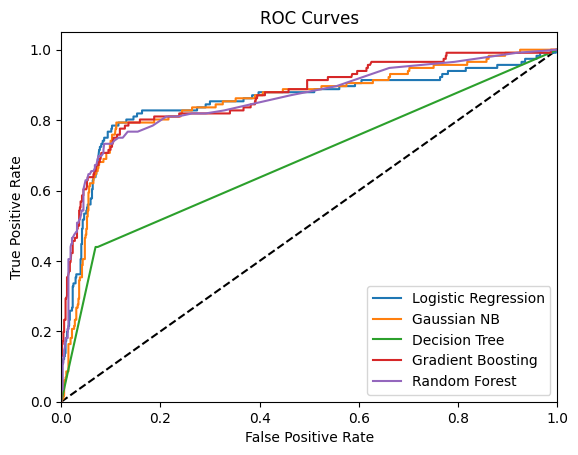

In [99]:
y_score = logistic_model.decision_function(X_test)
y_score_A = gaussian_model.predict_proba(X_test)[:,1]
y_score_B = decision_tree_model.predict_proba(X_test)[:,1]
y_score_C = gradient_boosting_model.decision_function(X_test)
y_score_D = random_forest_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.values,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test.values,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test.values,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score_D)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Gaussian NB')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.plot(fpr_D,tpr_D,label='Random Forest')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()